In [1]:
import numpy as np    # linear algebra
import pandas as pd     # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

In [2]:
data=pd.read_csv("riceClassification.csv")
print(data)

          id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
0          1  4537        92.229316        64.012769      0.719916   
1          2  2872        74.691881        51.400454      0.725553   
2          3  3048        76.293164        52.043491      0.731211   
3          4  3073        77.033628        51.928487      0.738639   
4          5  3693        85.124785        56.374021      0.749282   
...      ...   ...              ...              ...           ...   
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
0            4677      76.004525  0.657536    273.085   0.764510   
1            3015      

In [3]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
data.tail()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0
18184,18185,6134,153.081981,51.590606,0.941500,6283,88.374495,0.489975,338.613,0.672274,2.967245,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [6]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [7]:
data.isnull()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,False,False,False,False,False,False,False,False,False,False,False,False
18181,False,False,False,False,False,False,False,False,False,False,False,False
18182,False,False,False,False,False,False,False,False,False,False,False,False
18183,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [9]:
data['Class'].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

In [11]:
x=data.drop(['Class'],axis=1)
x

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000
...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216


In [12]:
y=data['Class']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 50)

In [14]:
X_train

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
17888,17889,7317,151.494482,62.294627,0.911545,7529,96.520950,0.659189,354.261,0.732649,2.431903
12733,12734,8679,155.765218,72.208540,0.886059,8956,105.121102,0.788642,374.688,0.776855,2.157158
10224,10225,5060,148.507426,44.298270,0.954475,5191,80.265759,0.451222,323.912,0.606047,3.352443
16835,16836,8914,163.637941,70.808530,0.901531,9165,106.534770,0.539915,387.200,0.747157,2.310992
10432,10433,6266,128.962259,62.299511,0.875574,6350,89.320317,0.808829,307.096,0.834934,2.070036
...,...,...,...,...,...,...,...,...,...,...,...
14565,14566,7224,143.388681,64.641489,0.892618,7343,95.905591,0.654407,337.722,0.795919,2.218214
15649,15650,8521,157.162587,69.675873,0.896355,8707,104.159849,0.566971,371.550,0.775650,2.255624
10123,10124,6002,161.674485,48.472825,0.953997,6260,87.418441,0.489400,367.851,0.557394,3.335363
5600,5601,6144,153.944288,51.936256,0.941372,6312,88.446502,0.673684,345.403,0.647156,2.964101


In [15]:
X_test

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
15900,15901,7769,150.240657,66.314697,0.897315,7899,99.457519,0.691684,351.913,0.788323,2.265571
4057,4058,5954,149.133007,51.974002,0.937306,6099,87.068182,0.497410,334.680,0.667973,2.869377
8008,8009,6471,162.121713,52.097412,0.946961,6661,90.769671,0.549741,356.701,0.639106,3.111896
3975,3976,5452,142.772899,49.829847,0.937117,5600,83.316877,0.557350,320.817,0.665658,2.865208
9715,9716,6207,162.612661,49.641688,0.952264,6389,88.898807,0.548079,358.562,0.606685,3.275728
...,...,...,...,...,...,...,...,...,...,...,...
13622,13623,8534,155.384680,71.015215,0.889452,8829,104.239274,0.646515,374.358,0.765223,2.188048
7109,7110,5019,141.314601,46.309985,0.944779,5166,79.939910,0.531505,313.722,0.640822,3.051493
14499,14500,8522,156.110819,70.454306,0.892367,8749,104.165961,0.572946,372.784,0.770614,2.215774
1974,1975,5448,138.971398,50.930427,0.930425,5637,83.286308,0.534589,318.403,0.675294,2.728652


In [16]:
y_train

17888    0
12733    0
10224    1
16835    0
10432    0
        ..
14565    0
15649    0
10123    1
5600     1
14000    0
Name: Class, Length: 14548, dtype: int64

In [17]:
y_test

15900    0
4057     1
8008     1
3975     1
9715     1
        ..
13622    0
7109     1
14499    0
1974     1
4660     1
Name: Class, Length: 3637, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

1.0

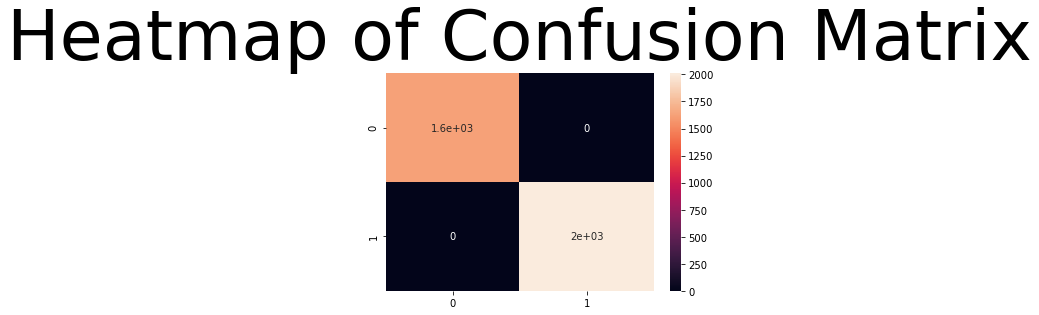

In [23]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.title('Heatmap of Confusion Matrix', fontsize = 70)
sns.heatmap(cm, annot = True)
plt.show()

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1627
           1       1.00      1.00      1.00      2010

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



In [25]:
# Scikit-Learn modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
X_train[:3], X_test[:3]

(array([[ 1.67466202,  0.19381076, -0.00644186,  0.24730815, -0.12224111,
          0.20449843,  0.24371167,  0.4063267 ,  0.09581993,  0.36161064,
         -0.38074527],
        [ 0.69294207,  1.11910965,  0.33633989,  1.23090749, -0.95401721,
          1.15154549,  1.10804643,  1.65032838,  0.7835404 ,  1.01665521,
         -1.01222098],
        [ 0.21512726, -1.33952227, -0.24619165, -1.53818312,  1.27885665,
         -1.3471456 , -1.38997186, -1.59218431, -0.92594679, -1.51440263,
          1.73503013]]),
 array([[ 1.3000978 ,  0.49280944, -0.15497069,  0.6489974 , -0.61230085,
          0.44076469,  0.53224314,  0.71964047, -0.01612249,  1.22118285,
         -0.78296903],
        [-0.95837086, -0.7609551 , -0.24705202, -0.78655768,  0.70737449,
         -0.77352483, -0.74154174, -1.11882846, -0.61737236, -0.58619066,
          0.60915081],
        [-0.2049123 , -0.40382217,  0.83272734, -0.77420398,  1.02600092,
         -0.39439666, -0.36098057, -0.62360923,  0.15092819, -1.01971

In [28]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

np.random.seed(42)

rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [29]:
# 100 estimators
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [34]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, x, y, scoring='accuracy', cv=10)
print(f"cross-val accuracy (mean): {np.mean(cv_acc)*100:.2f}%")

cross-val accuracy (mean): 90.12%


In [31]:
from sklearn.metrics import classification_report

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1627
           1       1.00      1.00      1.00      2010

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



In [35]:
clf = LogisticRegression()
cv_acc = cross_val_score(clf, x, y, scoring='accuracy', cv=10)
print(f"cross-val accuracy (mean): {np.mean(cv_acc)*100:.2f}%")

C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross-val accuracy (mean): 98.61%


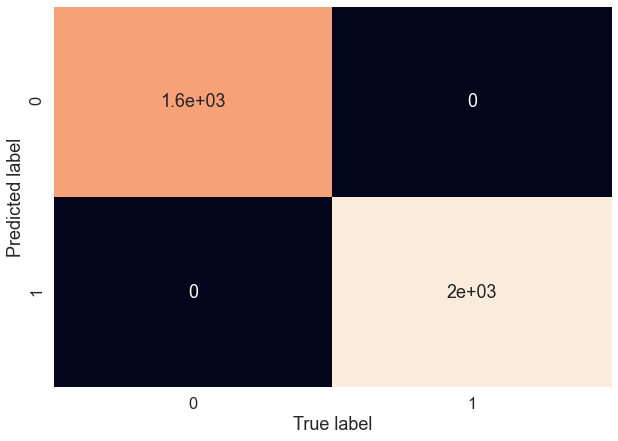

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

def plot_conf_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)